In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys


In [2]:
# Allow imports from parent directory 
# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im/35273613#35273613
#module_path = os.path.abspath(os.path.join(os.pardir))
module_path = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\programs\\'
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path

['',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\python36.zip',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\DLLs',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\Users\\agomez\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\agomez\\.ipython',
 'C:\\Users\\agomez\\Dropbox\\Harv

In [3]:
import time
import datetime

import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

import seaborn as sns

import itertools
import collections
import warnings
import IPython.display
import scipy.stats
import networkx as nx
from operator import itemgetter

plt.style.use('seaborn-white')
plt.rc('font', family='serif', serif='Helvetica')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=16, linewidth=0.5)


from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, PolynomialFeatures
from sklearn.decomposition import PCA, NMF
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from numpy.random import exponential, negative_binomial, randint, choice, binomial
from random import shuffle

import statsmodels.formula.api as smf

LETTERS = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]


In [4]:
import EComm_0001_complexities 

# Paths
path_fig = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\figures\\'
path_data = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\data\\'
path_outputdata = 'C:\\Users\\agomez\\Dropbox\\Harvard\\LittleProjects\\StochasticPS\\outputdata\\'

# format of figures
figformat = "png"

# -------------------------------------------------------------------------------------

# EXPLORING THE ECI WITH A SIMPLE MATRIX UNIFORMLY FILLED, WITH COMMUNITIES

In [5]:
kcomm = 5
mycolors = sns.color_palette("Set1", n_colors=kcomm, desat=.5)

In [6]:
uniformMcp_df = EComm_0001_complexities.create_toyMcp(240, 1440, K=kcomm, withinfill=0.6, betweenfill=0.1)

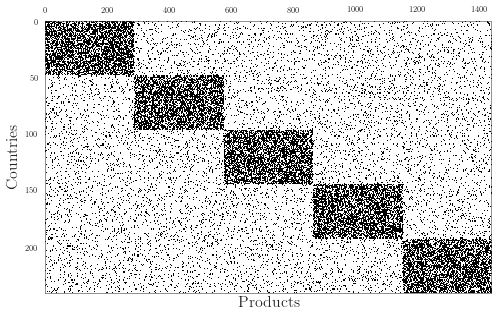

In [7]:
nmat, ncP, npP = EComm_0001_complexities.ReorderingMatrix(uniformMcp_df)

fig = plt.figure(figsize=(8,5))

ax1 = fig.add_subplot(111)
ax1.spy(uniformMcp_df, aspect='auto')
ax1.set_xlabel('Products')
ax1.set_ylabel('Countries')

#ax2 = fig.add_subplot(122)
#ax2.spy(nmat, aspect='auto')
#ax2.set_xlabel('Products')
#ax2.set_ylabel('Countries')

plt.show()

save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0008_uniform_Mcp_matrix_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

In [8]:
# Calculating the c2c and p2p matrices, eigenvalues and left-eigenvectors
(Mc2c, Dc, Vc), (Mp2p, Dp, Vp) = EComm_0001_complexities.ECeigenvecs(uniformMcp_df)
minsize = min(uniformMcp_df.shape)
print(minsize)

# Calculating the right-eigenvectors
rightDc, rightVc = np.linalg.eig(Mc2c)

240


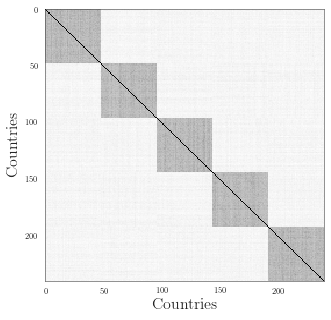

In [9]:
fig = plt.figure(figsize=(5,5))

ax1 = fig.add_subplot(111)
ax1.imshow(Mc2c, aspect='auto', interpolation='nearest')
ax1.set_xlabel('Countries')
ax1.set_ylabel('Countries')

#ax2 = fig.add_subplot(122)
#ax2.spy(nmat, aspect='auto')
#ax2.set_xlabel('Products')
#ax2.set_ylabel('Countries')

plt.show()

save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0008_uniform_C_matrix_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

In [10]:
# left-eigenvalue data frame
Vc_df = pd.DataFrame(Vc, index=Mc2c.index)
Vc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

# right-eigenvalue data frame
rightVc_df = pd.DataFrame(rightVc, index=Mc2c.index)
rightVc_df['Community'] = [cname[1] for cname in Mc2c.index.values]

print(Vc_df.head())
print(rightVc_df.head())

                    0         1         2         3         4         5  \
country_code                                                              
cA01          0.06455  0.073611  0.093853 -0.024889  0.002444 -0.134615   
cA02          0.06455  0.073388  0.093667 -0.025955  0.000956  0.167229   
cA03          0.06455  0.081037  0.101847 -0.033294  0.002669 -0.076132   
cA04          0.06455  0.075566  0.092600 -0.030444 -0.000602 -0.060828   
cA05          0.06455  0.071415  0.092362 -0.036184 -0.004745  0.008380   

                     6         7         8         9    ...           231  \
country_code                                            ...                 
cA01         -0.047916 -0.041287  0.001722  0.046734    ...      0.033165   
cA02          0.023365 -0.071694 -0.025132 -0.012048    ...     -0.045281   
cA03          0.016566 -0.019994  0.056975  0.003779    ...      0.069150   
cA04         -0.020922 -0.042486  0.011976 -0.019036    ...      0.069996   
cA05        

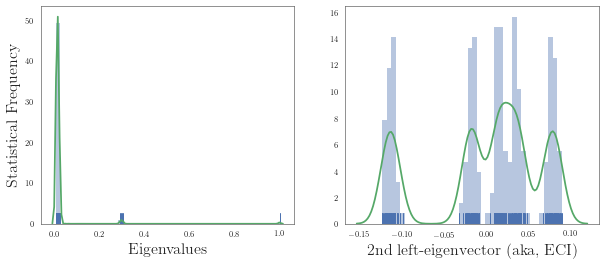

In [11]:
fig = plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
# histogram of country eigenvalues
sns.distplot(Dc, bins=50, rug=True, kde=False, norm_hist=True, ax=ax1, axlabel="Eigenvalues")
sns.kdeplot(Dc, bw=.005, ax=ax1)
ax1.set_ylabel("Statistical Frequency")

ax2 = fig.add_subplot(1,2,2)
# histogram of country ECI's
sns.distplot(Vc[:,1], bins=40, rug=True, kde=False, norm_hist=True, ax=ax2, axlabel="2nd left-eigenvector (aka, ECI)")
sns.kdeplot(Vc[:,1], bw=.01, ax=ax2)
plt.show()

save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0008_uniform_Frequencies_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

In [12]:
print("The number of clusters is: {}".format(np.sum(Dc>0.1)))

The number of clusters is: 5


In [13]:
communities_vec = LETTERS[:kcomm]
numcommunities = len(communities_vec)
rncomm = np.arange(numcommunities)
mycolors = sns.color_palette("Set1", n_colors=numcommunities, desat=.5)

(communities_vec, numcommunities, rncomm)


(['A', 'B', 'C', 'D', 'E'], 5, array([0, 1, 2, 3, 4]))

In [14]:
cty_marker_sizes = (uniformMcp_df.sum(axis=1).values/230.0)**10

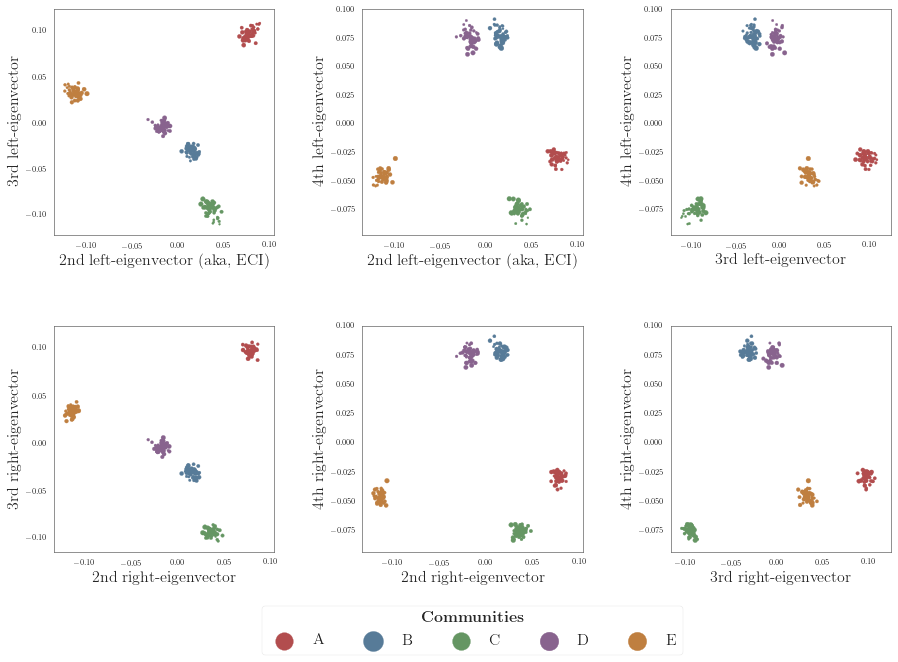

In [15]:
fig = plt.figure(figsize=(15,10))

#ax1 = fig.add_subplot(131)
#ax2 = fig.add_subplot(132)
#ax3 = fig.add_subplot(133)


#########################################################################
# FIRST ROW: LEFT-EIGENVECTORS
ax1 = fig.add_subplot(2,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(Vc_df[Vc_df.Community==target_name][1], Vc_df[Vc_df.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax1.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax1.set_ylabel('3rd left-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(2,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(Vc_df[Vc_df.Community==target_name][1], Vc_df[Vc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax2.set_xlabel('2nd left-eigenvector (aka, ECI)', fontsize=16)
ax2.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(2,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(Vc_df[Vc_df.Community==target_name][2], Vc_df[Vc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax3.set_xlabel('3rd left-eigenvector', fontsize=16)
ax3.set_ylabel('4th left-eigenvector', fontsize=16)
#plt.legend(loc="center left", shadow=False, scatterpoints=1, bbox_to_anchor=(1.1, 0.5))



#########################################################################
# SECOND ROW: RIGHT-EIGENVECTORS
ax4 = fig.add_subplot(2,3,4)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax4.scatter(rightVc_df[rightVc_df.Community==target_name][1], rightVc_df[rightVc_df.Community==target_name][2],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax4.set_xlabel('2nd right-eigenvector', fontsize=16)
ax4.set_ylabel('3rd right-eigenvector', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax5 = fig.add_subplot(2,3,5)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax5.scatter(rightVc_df[rightVc_df.Community==target_name][1], rightVc_df[rightVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax5.set_xlabel('2nd right-eigenvector', fontsize=16)
ax5.set_ylabel('4th right-eigenvector', fontsize=16)

# LEGEND
ax5legend = ax5.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=6,
          title=r'$\bf{Communities}$', fontsize=16, frameon=True, fancybox=True, markerscale=5)
plt.setp(ax5legend.get_title(),fontsize=16)

ax6 = fig.add_subplot(2,3,6)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax6.scatter(rightVc_df[rightVc_df.Community==target_name][2], rightVc_df[rightVc_df.Community==target_name][3],
                c=color, label=target_name, 
                s=cty_marker_sizes[rightVc_df.Community==target_name])
ax6.set_xlabel('3rd right-eigenvector', fontsize=16)
ax6.set_ylabel('4th right-eigenvector', fontsize=16)





plt.subplots_adjust(wspace=0.4, hspace=0.4)

#plt.axis([-2, 3, -3, 3])
plt.show()

save2file=True
if(save2file):
    fig.savefig(path_fig + "EComm_0008_uniform_toyMcp_{k}communities.{ff}".format(k=kcomm, ff=figformat), bbox_inches='tight')

### Principal Component Analysis on the Mcp

In [16]:
pca = PCA(n_components = 5, whiten = True)
X_pca = pca.fit_transform(uniformMcp_df)

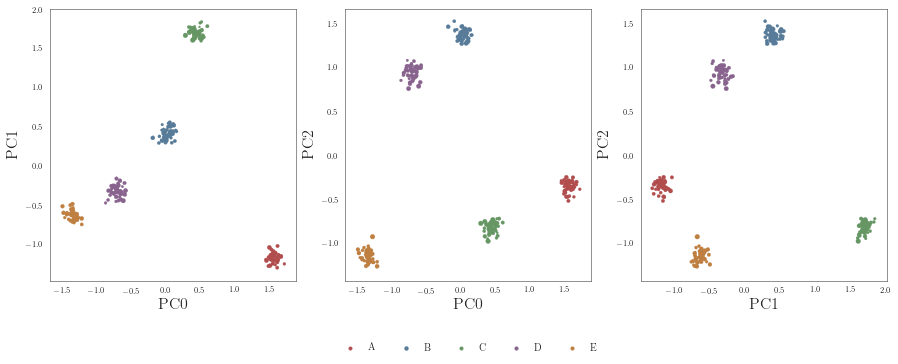

In [17]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax1.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 1],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax1.set_xlabel('PC0', fontsize=16)
ax1.set_ylabel('PC1', fontsize=16)
#plt.legend(loc="best", shadow=False, scatterpoints=1)

ax2 = fig.add_subplot(1,3,2)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax2.scatter(X_pca[Vc_df.Community==target_name, 0], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax2.set_xlabel('PC0', fontsize=16)
ax2.set_ylabel('PC2', fontsize=16)
plt.legend(loc="upper center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.2), ncol=5)

ax3 = fig.add_subplot(1,3,3)
for color, i, target_name in zip(mycolors, rncomm, np.array(communities_vec)):
    ax3.scatter(X_pca[Vc_df.Community==target_name, 1], X_pca[Vc_df.Community==target_name, 2],
                c=color, label=target_name, 
                s=cty_marker_sizes[Vc_df.Community==target_name])
ax3.set_xlabel('PC1', fontsize=16)
ax3.set_ylabel('PC2', fontsize=16)
#plt.legend(loc="center", shadow=False, scatterpoints=1, bbox_to_anchor=(0.5, -0.05), ncol=5)


#plt.axis([-2, 3, -3, 3])
plt.show()